In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


###Demonstrate using the simulator at the region level, stochastic integration, ReducedWongWang model with default paramters.

The large
speed conduction speed is used to neglect the time-delays as in
[DPA_2013]_

Using the Hagmann 66 ROI connectome, it's possible to obtain similar
results as those obtained with the Python code provided by the
authors.

When using the default TVB connectivity matrix, then the slope 'a' of
the Linear coupling function should be divided by a factor of at least
100 to obtain similar results (see below).


``Run time``: 

``Memory requirement``: < 1GB

References:

[DPA_2013]     Deco Gustavo, Ponce Alvarez Adrian, Dante Mantini, Gian Luca Romani, Patric Hagmann and Maurizio Corbetta. Resting-State Functional Connectivity Emerges from Structurally and Dynamically Shaped Slow Linear Fluctuations. The Journal of Neuroscience 32(27), 11239-11252, 2013.


In [2]:
from tvb.simulator.lab import *


####Perform the simulation

In [3]:
LOG.info("Configuring...")

In [4]:
#Initialise a Model, Coupling, and Connectivity.
rww = models.ReducedWongWang()

In [5]:
#Change the state variable range to constraint the initial conditions 
rww.state_variable_range['S'] = numpy.array([0.0, 0.01])

In [6]:
#Initialise a Connectivity
white_matter = connectivity.Connectivity(load_default=True)
white_matter.speed = numpy.array([20000.0])
white_matter_coupling = coupling.Linear(a=1.05 / 100.)

In [7]:
#Initialise an Integrator
hiss = noise.Additive(nsig=rww.sigma_noise)
heunint = integrators.EulerStochastic(dt=0.1, noise=hiss)

In [8]:
#Initialise some Monitors with period in physical time
momo = monitors.Raw()
mama = monitors.TemporalAverage(period=1.)
#Bundle them
what_to_watch = (momo, mama)

In [9]:
#Initialise a Simulator -- Model, Connectivity, Integrator, and Monitors.
sim = simulator.Simulator(model=rww, connectivity=white_matter,
                          coupling=white_matter_coupling,
                          integrator=heunint, monitors=what_to_watch)
sim.configure()

Simulator(bound=False, value=None)

In [10]:
LOG.info("Starting simulation...")
#Perform the simulation
raw_data = []
raw_time = []
tavg_data = []
tavg_time = []

for raw, tavg in sim(simulation_length=6000.):
    if not raw is None:
        raw_time.append(raw[0])
        raw_data.append(raw[1])
    
    if not tavg is None:
        tavg_time.append(tavg[0])
        tavg_data.append(tavg[1])

LOG.info("Finished simulation.")

####Plot pretty pictures of what we just did  

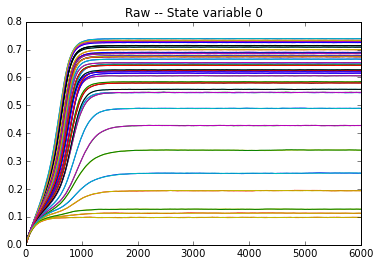

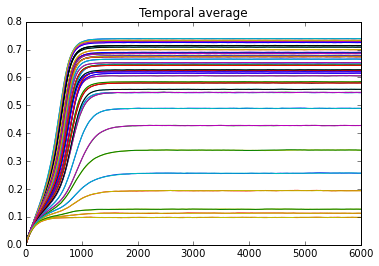

In [11]:
#Plot defaults in a few combinations

#Make the lists numpy.arrays for easier use.
RAW = numpy.array(raw_data)
TAVG = numpy.array(tavg_data)

#Plot raw time series
figure(1)
plot(raw_time, RAW[:, 0, :, 0])
title("Raw -- State variable 0")

#Plot temporally averaged time series
figure(2)
plot(tavg_time, TAVG[:, 0, :, 0])
title("Temporal average")

#Show them
show()